# **LINEAR REGRESSION PROBLEM**

Dataset: Car radios

A prediction model based on the linear regression model will be developed, to
predict the percentage of the defective radios.
To predict the percentage of defective radios will help the company to better
manage the factors leading to higher percentage of defective radios.

# **1. INTRODUCTION**

We have already explored the dataset of the de defective car radios, essential through plots in the third class. We have gained some intuitive understanding of important predictors. However, we have not yet developed a prediction model. That is what we are now going to do.
We will use, as prediction model, the **linear regression model**.
The code structure that we will create will be able to be used with other prediction models with minimal changes!

# **2. DATASET READING**

To read the dataset, we will use pandas as usual. We first need to load pandas. Since we will probably use numpy as well later, we can also load numpy too:

In [79]:
import pandas as pd
import numpy as np

In [80]:
df = pd.read_excel('/content/data_carradios.xlsx')
print(df)

     perc_defec      bdate  team  training      datep  prizeq  prized
0          0.00 1981-07-02     8         1 2021-07-01       0       0
1         36.32 1992-06-14     6         0 2021-07-02       0       0
2         48.91 2003-05-28     7         0 2021-07-05     500       0
3         20.36 1992-06-14    10         0 2021-07-06       0       0
4         42.07 2003-05-28     7         0 2021-07-07     500       0
..          ...        ...   ...       ...        ...     ...     ...
995       21.50 1981-07-02     1         0 2021-12-13       0       0
996        7.53 1981-07-02     2         0 2021-12-14     500     600
997       27.70 1997-12-05    10         0 2021-12-15       0       0
998        0.00 1986-12-23     5         0 2021-12-16       0     600
999       38.39 1986-12-23     6         0 2021-12-17       0       0

[1000 rows x 7 columns]


**Preprocessing of data**

This step aims to prepare the data to be used by the model. In general, it involves multiple steps. To automate the preprocessing stage, we will use `sklearn` pipelines.

The `sklearn` functions need the original dataset separated into two dataframes:
* X, which must contain all the predictors;
* y, which must contain only the outcome variable.

To create dataframes X and y:

In [81]:
X = df.drop('perc_defec', axis=1)
y = df ['perc_defec']

In [82]:
X

,bdate,team,training,datep,prizeq,prized
0,1981-07-02,8,1,2021-07-01,0,0
1,1992-06-14,6,0,2021-07-02,0,0
2,2003-05-28,7,0,2021-07-05,500,0
3,1992-06-14,10,0,2021-07-06,0,0
4,2003-05-28,7,0,2021-07-07,500,0
...,...,...,...,...,...,...
995,1981-07-02,1,0,2021-12-13,0,0
996,1981-07-02,2,0,2021-12-14,500,600
997,1997-12-05,10,0,2021-12-15,0,0
998,1986-12-23,5,0,2021-12-16,0,600


In [83]:
y

0       0.00
1      36.32
2      48.91
3      20.36
4      42.07
       ...  
995    21.50
996     7.53
997    27.70
998     0.00
999    38.39
Name: perc_defec, Length: 1000, dtype: float64

**Split of data into train and test sets**

O `train data` é utilizado para ajustar os parâmetros do modelo, ou seja, para treinar o modelo, enquanto o `test data` é utilizado para avaliar o desempenho do modelo em dados não vistos durante o treinamento.
Existem várias razões pelas quais esta divisão é importante: avaliação do desempenho do modelo e evitar o overfitting.

We will randomly split the data into train and test sets:

* train set - we will create the model (usual 80%)
* test set - to get an idea about how the model will work with unseen cases (usual 20%)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# **3. PIPELINES CREATION**

As already seen in the third classroom (plots on this dataset), we need to transform the birth date and the date of production to ages and weekdays, respectively. We can automate that transformation by using `pipelines` and `column transformer`.

**1ST - AGES**

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

Since we need to use function now of library `datetime`, we need to load that library:

In [87]:
import datetime

We now create a `function` that, **given a column of dates, returns a column of ages**. For the sake of a better integration with pipelines and column transformers, the column is expected to be a dataframe and the returned result is also expected to be a dataframe.

In [88]:
def get_ages(col):
  result = (datetime.datetime.now() - col).astype('<m8[Y]') # Calculate the age difference in years between the current datetime and the values in the column
  result = pd.DataFrame(result) # Convert the resulting numpy array to a pandas DataFrame
  return result # Return the resulting DataFrame

The given code defines a function `get_ages` which takes a pandas DataFrame column `col` containing datetime values as input. It calculates the difference between the current datetime and the values in the column `col`, in years, using the astype method of the pandas DataFrame. The resulting values are then stored in a new pandas DataFrame `result` and returned by the function.

Because get_ages is a user-defined function (and not an embedded Python function), we need to use `FunctionTransformer` function:

In [89]:
from sklearn.preprocessing import FunctionTransformer

To create a pipeline with `get_ages` function, we can do:

In [90]:
from sklearn.pipeline import Pipeline

In [91]:
ager = Pipeline([
    ('ages', FunctionTransformer(get_ages, feature_names_out='one-to-one'))
])

The purpose of setting `feature_names_out='one-to-one'` is to specify the name of the feature produced by the `FunctionTransformer`.

Since we will use get_ages only on column bdate, the bdate name will be passed
on to the respective chained pipelines and transformers. (If we do not use
feature_names_out='one-to-one', we will not be able to get the names of the
coefficients of the model, after the model is fit!)

**Scaling the data**

Considering that we need to scale the column bdate after having it converted to ages, we need to add a `scaler` to the pipeline ager and beforehand load the respective function:

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
ager = Pipeline([
    ('ages', FunctionTransformer(get_ages, feature_names_out='one-to-one')),
    ('scale', StandardScaler())
])

Now that we have the `ager pipeline` ready, we can insert it into the ColumnTranformer.
We must be warned that we will only define the ColumnTransformer, but, for now, we
will not run it – we run it only when we run pipe.fit. Consequently, no change in any column of the dataframe will take place until we run `pipe.fit`.


**NOTE:** until now the scaler is just defined and is not applied to any column. Before the scaler is applied to any column, we need to tell Python which columns we want to scale. To accomplish that, we need to use `ColumnTransformer`. In this case, we only want to scale `bdate`.

The `ColumnTransformer`:

In [94]:
from sklearn.compose import ColumnTransformer

In [95]:
preprocessor = ColumnTransformer([
    ('age_tr', ager, ['bdate'])],
    remainder = 'passthrough')

NOTE - `remainder` stands for the remain (o que sobra) and not reminder (lembrar).

# **RESUMO DOS PASSOS ATÉ AGORA:**

O código que você mencionou está usando um pipeline que envolve várias etapas de processamento de dados:

1. Definição da função `get_ages`: Esta função calcula a idade em anos a partir de uma coluna de datas de nascimento. A função recebe uma coluna de datas como entrada e retorna uma coluna de idades correspondentes.

2. Criação do pipeline `ager`: Este pipeline usa a classe Pipeline do scikit-learn para construir uma sequência de etapas de processamento de dados. A única etapa neste pipeline é o transformador FunctionTransformer, que é usado para aplicar a função get_ages a uma coluna de dados. O parâmetro feature_names_out é usado para especificar o nome da coluna de saída produzida pelo transformador.

3. Aplicação do `scaler`: Depois de obter as idades a partir da coluna de datas de nascimento, é comum escalar os dados para garantir que todas as variáveis tenham a mesma escala. Isso é feito para evitar que variáveis com unidades ou escalas diferentes tenham pesos desproporcionais em modelos de machine learning. O código que você mencionou não inclui o scaler, mas normalmente ele seria adicionado após a etapa ager.

4. Criação do `preprocessor`: O preprocessor é um objeto ColumnTransformer que é usado para aplicar transformações específicas a colunas de dados específicas. Neste caso, o preprocessor está definido para aplicar o pipeline ager à coluna com o nome "birth_date". Isso significa que o preprocessor aplica a função get_ages a essa coluna para calcular as idades correspondentes e, em seguida, aplica o scaler aos dados resultantes.

**=> O pipeline completo é usado para aplicar transformações específicas aos dados de entrada para prepará-los para a modelagem de machine learning. A função get_ages é usada para calcular as idades a partir da coluna de datas de nascimento, o scaler é usado para garantir que todas as variáveis tenham a mesma escala e o preprocessor é usado para aplicar essas transformações específicas às colunas de dados específicas.**





How can we be sure the column transformation is being done correctly?

In [96]:
preprocessor.fit_transform(X_train)

array([[-1.0050044058180092, 5, 0, Timestamp('2021-07-23 00:00:00'), 0,
        600],
       [0.07540346605801468, 10, 0, Timestamp('2021-10-06 00:00:00'), 0,
        0],
       [0.07540346605801468, 2, 0, Timestamp('2021-07-05 00:00:00'), 500,
        600],
       ...,
       [0.07540346605801468, 9, 0, Timestamp('2021-09-30 00:00:00'), 500,
        600],
       [-1.9053442990480292, 10, 0, Timestamp('2021-08-30 00:00:00'), 0,
        0],
       [0.07540346605801468, 2, 0, Timestamp('2021-11-09 00:00:00'), 500,
        600]], dtype=object)

It is clear that the first column of the dataframe, `bdate` was transformed.

**2ND - WEEKDAYS**

We first create a function, `get_weekdays`, that, given a column of dates, returns the respective weekdays. As already discussed, for the sake of a better integration with pipelines and column transformers, the column is expected to be a dataframe and the returned result is also expected to be a dataframe.

In [104]:
def get_weekdays(col):
  result = col.iloc[:,0].dt.weekday
  result = pd.DataFrame(result)
  return result

Esta função `get_weekdays` recebe uma coluna de datas como entrada (`col`), extrai o dia da semana correspondente a cada data e retorna uma coluna de inteiros contendo os dias da semana correspondentes.

A primeira linha da função (`col.iloc[:,0]`) extrai todas as linhas `:` da primeira coluna `0` ([:,0] é uma forma de indexação do pandas) da entrada, assumindo que a entrada é um DataFrame com apenas uma coluna.

Em seguida, a função `dt.weekday` é aplicada a essa coluna para extrair o dia da semana correspondente a cada data.

De seguida, o código cria um objeto pandas DataFrame a partir do resultado obtido.


To create a pipeline with `get_weekdays` function, we can do:


In [106]:
weeker = Pipeline([
    ('weekd', FunctionTransformer(get_weekdays, feature_names_out='one-to-one'))
])

We can add this pipeline to the ColumnTransformer:

In [107]:
preprocessor = ColumnTransformer([
    ('age_tr', ager, ['bdate']),
    ('week_tr', weeker, ['datep'])],
    remainder='passthrough')

The transformed column assumes values of 0, 1, 3 and 4. These numbers do not represent a numerical amount: They are instead categories. When a predictor is categorical, it is recommended to transform them to **dummy variables**, using an `one-hot conversion`.

**NOTE:**

To see how the one-hot conversion works, consider a categorical variable X, having three classes A, B and C. The one-hot conversion transforms the original categorical variable into as many variables as classes, one for each class, and, for each one of these newly created variables, it sets to 1 whether the value of X is of the respective class and 0
otherwise.

Notice that: if X_A and X_B are both zero, then the class is C; if X_A and X_C are both zero, then the class is B; if X_B and X_C are both zero, then the class is A. In sum, each of these binary variables is fully determined by the other binary variables. Consequently, we can remove one of these binary variable, as being redundant.

Having us learned the one-hot encoding, we can add it to the pipeline weeker. But before, we need to load `OneHotEncoder` function:

In [100]:
from sklearn.preprocessing import OneHotEncoder

Adding the one-hot encoding to the pipelien weeker:

In [108]:
weeker = Pipeline([
    ('weekd', FunctionTransformer(get_weekdays, feature_names_out='one-to-one')),
    ('onehot', OneHotEncoder(drop='first'))
])

We are dropping the first binary variable (`drop='first'`), because of **multicolinearity**. Since one of the binary variables, resulting from the `one-hot encoding`, is fully determined
by the other binary variables, one binary variable is redundant and must be removed from the linear regression model, as it is known that multicolinearity impacts negatively the  predictive performance of the linear regression model.

To check if the one-hot encoding was done correctly, we can do:

In [109]:
preprocessor = ColumnTransformer([
    ('age_tr', ager, ['bdate']),
    ('week_tr', weeker, ['datep'])],
    remainder='passthrough')

preprocessor.fit_transform(X_train)[:3, :]

array([[-1.00500441e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  5.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  6.00000000e+02],
       [ 7.54034661e-02,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.54034661e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  5.00000000e+02,  6.00000000e+02]])

Everything seems to be fine, as we see more columns than before, a sign that the onehot encoding is being performed (it creates more columns, corresponding to the binary variables).

Since the `team` variable is also categorical, we need to one-hot encode it:

In [110]:
preprocessor = ColumnTransformer([
    ('age_tr', ager, ['bdate']),
    ('week_tr', weeker, ['datep']),
    ('team_tr', OneHotEncoder(drop='first'), ['team'])],
    remainder='passthrough')

Finnaly, we need to scale the prize columns:

In [111]:
from sklearn.preprocessing import StandardScaler

In [113]:
preprocessor = ColumnTransformer([
    ('age_tr', ager, ['bdate']),
    ('week_tr', weeker, ['datep']),
    ('team_tr', OneHotEncoder(drop='first'), ['team']),
    ('scale_tr', StandardScaler(), ['prized', 'prizeq'])],
    remainder='passthrough')

We may wonder about the question: Why have not we used pipelines to transform columns
team, prizeq and prized? We could have used pipelines as well – it would also work fine. However, since the transformation of the mentioned columns consists only of a single step,
we can avoid using pipelines.

# APANHADO DO QUE FIZEMOS ATÉ AGORA

Primeiro criámos um preprocessor com a função e scaler para calcular os anos (ager), depois um preprocessor para os dias da semana com uma função em que tivemos que usar a functiontransformer para criar o pipeline, depois tivemos de usar nos dias da semana o onehot encoder (weeker). O preprocessor atualizou e ficou com dias da semana binárias e anos. A este preprocessor acrescentamos uma column transformer onde eliminarmos a primeira categoria da variável equipa e ainda escalamos duas variáveis (prized e prizeq).

**=> Ao colocar todos esses componentes em um único pré-processador, tornou-se mais fácil criar e ajustar o modelo de regressão linear final, pois todas as etapas de pré-processamento foram consolidadas em um único objeto que pode ser facilmente passado como entrada para a função de ajuste do modelo.**


# **4.MODEL CREATION AND ESTIMATION**

All preprocessing if defined. Now, we need to define the pipeline with the model.

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
pipe = Pipeline([
    ('pre', preprocessor),
    ('lm',  LinearRegression())
])

Now, we can adjust the linear regression model using the previously defined pipeline.

"fit" significa que estamos ajustando todas as etapas de pré-processamento e o modelo de regressão linear em conjunto, usando o método `fit()` do objeto `Pipeline`.

In [116]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_tr',
                                                  Pipeline(steps=[('ages',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function get_ages at 0x7fd359de3b80>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['bdate']),
                                                 ('week_tr',
                                                  Pipeline(steps=[('weekd',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function get_weekdays at 0x7fd31e507430>)),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['datep']),
                                                 ('team_tr',
                                                  OneHotEncoder(drop='first'),
                                                  ['team']),
                                                 ('scale_tr', StandardScaler(),
                                                  ['prized', 'prizeq'])])),
                ('lm', LinearRegression())])

No caso específico de `pipe.fit(X_train, y_train)`, estamos ajustando o modelo de regressão linear e aplicando todas as etapas de pré-processamento definidas anteriormente ao conjunto de treinamento `X_train` e `y_train`.

O primeiro argumento `X_train` é um array ou dataframe que contém as amostras de treinamento, enquanto o segundo argumento `y_train` é um array ou dataframe que contém o resultado esperado correspondentes a cada amostra de treinamento.

Now, to make predicitions for the outcome variable (train set):

In [117]:
y_pred = pipe.predict(X_train)
y_pred

array([20.08740234, 20.41943359, 10.64794922,  2.07958984, 30.55419922,
       20.18896484, 38.86279297, 20.26904297, 30.61669922, 20.64013672,
       30.55419922, 38.41552734,  1.99755859, 20.46630859, 20.10888672,
       20.63232422, 39.83154297, 20.32177734,  2.44287109, 20.34716797,
       39.83154297, 57.99560547, 20.10888672,  9.65576172,  9.78857422,
       20.40185547,  2.08740234,  1.78466797,  2.14990234, 29.56787109,
       48.71044922, 17.26318359,  9.65576172, 20.46630859, 39.83154297,
       11.29248047, 38.49560547, 30.18896484,  1.45849609, 39.60498047,
        1.91943359,  2.31787109, 21.30029297, 39.60498047, 30.18896484,
       20.56005859, 39.29052734, 39.15576172,  1.45849609, 39.55029297,
       -0.88525391, 20.20458984, 39.97998047,  1.24169922, 39.60498047,
       10.95654297,  1.10107422, 11.13623047, 10.64013672, 19.64599609,
       29.67529297, -0.76025391, 20.33935547,  2.31787109, 11.65966797,
       19.43310547, 19.13818359,  1.10107422, 20.84716797,  1.32

No caso específico de `pipe.predict(X_train)`, estamos fazendo previsões nos dados de treinamento após o modelo de regressão linear ter sido treinado com as etapas de pré-processamento definidas anteriormente. O resultado é uma matriz `y_pred` que contém as previsões de rótulo para cada amostra no conjunto de treinamento `X_train`.

The estimates of the parameters can also be obtained, i.e., the coefficients:

In [118]:
print(preprocessor.get_feature_names_out())
print(pipe.named_steps['lm'].coef_)

['age_tr__bdate' 'week_tr__datep_1' 'week_tr__datep_2' 'week_tr__datep_3'
 'week_tr__datep_4' 'team_tr__team_2' 'team_tr__team_3' 'team_tr__team_4'
 'team_tr__team_5' 'team_tr__team_6' 'team_tr__team_7' 'team_tr__team_8'
 'team_tr__team_9' 'team_tr__team_10' 'scale_tr__prized'
 'scale_tr__prizeq' 'remainder__training']
[ 1.48278793e-01 -9.93714999e-01 -8.04527352e-03 -2.39038972e-01
  1.81492952e+01  1.07374212e+13  9.71476103e+00  6.05878660e+12
 -4.05963195e+13 -4.99624694e-01  5.13337407e+13  6.05878660e+12
  1.07374212e+13 -5.80508847e-01  1.85589461e+13 -2.34391196e+13
 -6.05878660e+12]


In [119]:
feature_names = preprocessor.get_feature_names_out()
coefficients = pipe.named_steps['lm'].coef_
df2 = pd.DataFrame({'Feature Name': feature_names, 'Coefficient': coefficients})
print(df2)

           Feature Name   Coefficient
0         age_tr__bdate  1.482788e-01
1      week_tr__datep_1 -9.937150e-01
2      week_tr__datep_2 -8.045274e-03
3      week_tr__datep_3 -2.390390e-01
4      week_tr__datep_4  1.814930e+01
5       team_tr__team_2  1.073742e+13
6       team_tr__team_3  9.714761e+00
7       team_tr__team_4  6.058787e+12
8       team_tr__team_5 -4.059632e+13
9       team_tr__team_6 -4.996247e-01
10      team_tr__team_7  5.133374e+13
11      team_tr__team_8  6.058787e+12
12      team_tr__team_9  1.073742e+13
13     team_tr__team_10 -5.805088e-01
14     scale_tr__prized  1.855895e+13
15     scale_tr__prizeq -2.343912e+13
16  remainder__training -6.058787e+12


A primeira linha, `preprocessor.get_feature_names_out()`, imprime os nomes das variáveis ​​no formato transformado pelo preprocessor definido anteriormente. O `get_feature_names_out()` é um método do `ColumnTransformer` que retorna os **nomes das colunas após o processamento pelo transformador**.

A segunda linha, `pipe.named_steps['lm'].coef_`, imprime os **coeficientes de regressão estimados para cada variável no modelo de regressão linear**. O `named_steps['lm']` é uma referência ao objeto `LinearRegression` criado durante a definição do pipeline. A propriedade `coef_` desse objeto retorna os coeficientes estimados para cada variável.

**=> Essas informações podem ser úteis para interpretar o modelo e entender quais variáveis ​​estão mais fortemente relacionadas com a variável de saída.**

In [120]:
# Obter nomes das variáveis transformadas pelo preprocessor
feature_names = preprocessor.get_feature_names_out()

# Obter coeficientes estimados do modelo de regressão linear
coeficients = pipe.named_steps['lm'].coef_

# Criar um dicionário que associa cada variável ao seu coeficiente estimado
coef_dict = dict(zip(feature_names, coeficients))

# Imprimir o dicionário
print(coef_dict)

{'age_tr__bdate': 0.1482787934887428, 'week_tr__datep_1': -0.9937149987957152, 'week_tr__datep_2': -0.008045273522656986, 'week_tr__datep_3': -0.2390389717036645, 'week_tr__datep_4': 18.149295187787168, 'team_tr__team_2': 10737421192986.375, 'team_tr__team_3': 9.714761029577394, 'team_tr__team_4': 6058786601898.11, 'team_tr__team_5': -40596319482563.55, 'team_tr__team_6': -0.499624693923916, 'team_tr__team_7': 51333740675560.21, 'team_tr__team_8': 6058786601894.906, 'team_tr__team_9': 10737421192987.254, 'team_tr__team_10': -0.5805088469060941, 'scale_tr__prized': 18558946121030.258, 'scale_tr__prizeq': -23439119638554.37, 'remainder__training': -6058786601916.801}


Este código criará um dicionário `var_coef_dict` que associa o nome de cada variável ao seu coeficiente estimado no modelo de regressão linear.

# **5. PREDICTIVE PERFORMANCE OF THE MODEL**

To determine the predictive performance of the model:

In [121]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [122]:
print(f'MAE={mean_absolute_error(y_train, y_pred)}')
print(f'MSE={mean_squared_error(y_train, y_pred)}')
print(f'RMSE={mean_squared_error(y_train, y_pred, squared=False)}')
print(f'R2={r2_score(y_train, y_pred)}')

MAE=3.3389007324218745
MSE=18.77517794458008
RMSE=4.333033342195751
R2=0.9174359688584746


These are code snippets in Python that compute various evaluation metrics for a machine learning model. Assuming that 'y_train' is the true target variable for the training set, and 'y_pred' is the predicted target variable obtained by applying the pipeline to the training set.

'mean_absolute_error(y_train, y_pred)' computes the mean absolute error (MAE) between the true and predicted target variable. This metric gives an idea of how far off the predictions are on average from the true target variable, regardless of the direction (i.e., overestimation or underestimation).

'mean_squared_error(y_train, y_pred)' computes the mean squared error (MSE) between the true and predicted target variable. This metric gives an idea of the average squared distance between the predicted and true target variable. MSE is a common metric used in regression problems, and it gives more weight to larger errors than the MAE.

'mean_squared_error(y_train, y_pred, squared=False)' computes the root mean squared error (RMSE) between the true and predicted target variable. This metric is the square root of the MSE, and it gives an idea of the average distance between the predicted and true target variable in the original units of the target variable.

'r2_score(y_train, y_pred)' computes the R^2 (coefficient of determination) score between the true and predicted target variable. This metric measures the proportion of the variance in the target variable that is explained by the model. An R^2 score of 1.0 indicates a perfect fit, while a score of 0.0 indicates that the model does not explain any of the variance in the target variable. A negative R^2 score indicates that the model is worse than simply predicting the mean of the target variable.

#ANALYSIS

Esses resultados indicam que o modelo tem um bom desempenho ao prever a percentagem de rádios com defeito tendo em conta as variáveis explicativas do modelo. O R2 indica que o modelo explica cerca de 91,74% da variação dos dados. No entanto, é importante relembrar que estas `metrics` são calculadas com base nos dados de treinamento e é necessário avaliar o desempenho do modelo em dados de teste para verificar se ele é capaz de generalizar bem.
Portanto, é recomendável que você use um conjunto de teste separado para avaliar a precisão do modelo em dados não vistos, em vez de avaliá-lo nos dados de treinamento.

To get an idea about our model works with unseen data, we will use the `test set`, which has not been used for anything up to now.

In [123]:
y_pred2 = pipe.predict(X_test)

In [124]:
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = mean_squared_error(y_test, y_pred2, squared=False)
r22 = r2_score(y_test, y_pred2)

In [125]:
print(f'MAE={mae}')
print(f'MSE={mse}')
print(f'RMSE={rmse}')
print(f'R22={r22}')

MAE=3.8249537109375003
MSE=25.228629709472656
RMSE=5.0228109370622995
R22=0.8928503531812346


Since the measure of errors are similar for the test set, we can expect good performance of the model in unseen new cases.

#ANALYSIS

Os resultados indicam que o modelo tem um desempenho semelhante nos dados de treino e de teste, o que é positivo. No entanto, o erro absoluto médio (MAE) e o erro quadrático médio (MSE) são maiores nos dados de teste, o que pode indicar que o modelo não está generalizando tão bem para dados não vistos. O coeficiente de determinação (R2) também é um pouco menor nos dados de teste, o que sugere que o modelo explica um pouco menos da variância nos dados de teste do que nos dados de treino.

**Concluindo, os valores obtidos sugerem que o modelo se ajusta bem e generaliza bem para os dados e o modelo utilizado é adequado.**

**NO ENTANTO**

O valor do R2 de 92% indica que 92% da variação na variável dependente (percentagem de rádios para carros com defeito) é explicada pelas variáveis independentes do modelo. No entanto, mesmo com um bom valor de R2, ainda é importante **avaliar a qualidade dos resíduos**, pois eles podem revelar possíveis problemas no modelo, como heterocedasticidade, multicolinearidade ou outliers => fazer gráficos

#**PLOTS**

**1st PLOT**

We can plot the residuals (that is, the prediction errors), to have a broader understanding.

O **plot de resíduos** pode ajudar a identificar padrões nos erros, como heterocedasticidade ou não-linearidade, que podem indicar que o modelo não está capturando adequadamente a relação entre as variáveis independentes e dependentes.

In [126]:
from matplotlib import pyplot as plt

In [127]:
import seaborn as sns

In [128]:
residuals = y_train - y_pred
residuals

791   -1.787402
143    6.280566
880    2.892051
339   -0.079590
992   -6.584199
         ...   
544    2.642676
892   -5.554199
643    1.057520
414   -2.172324
971    4.474238
Name: perc_defec, Length: 800, dtype: float64

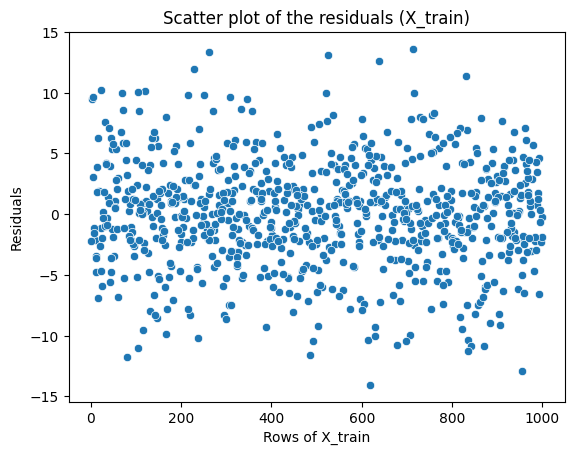

In [129]:
sns.scatterplot(residuals)
plt.xlabel('Rows of X_train')
plt.ylabel('Residuals')
plt.title('Scatter plot of the residuals (X_train)')
plt.show()

A **análise dos resíduos** é importante para avaliar a qualidade do ajuste do modelo. Neste caso, apesar de os valores variarem entre -15 e 15 isso não significa que os o modelo tem uma má performance. Porque os resíduos estão à mesma escala que a variável dependente. Então aqui temos -15% e 15%, não é muito, é bastante próximo de 0 uma vez que o máximo da variável é 66.

# **Tentar fazer a dividir pela média.**



In [130]:
residuals2 = y_train - y_pred
residuals2

791   -1.787402
143    6.280566
880    2.892051
339   -0.079590
992   -6.584199
         ...   
544    2.642676
892   -5.554199
643    1.057520
414   -2.172324
971    4.474238
Name: perc_defec, Length: 800, dtype: float64

In [131]:
mean_residuals2 = np.mean(residuals2)


In [132]:
residuals2_normalized = (residuals2 - mean_residuals2)/np.sqrt(residuals2)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


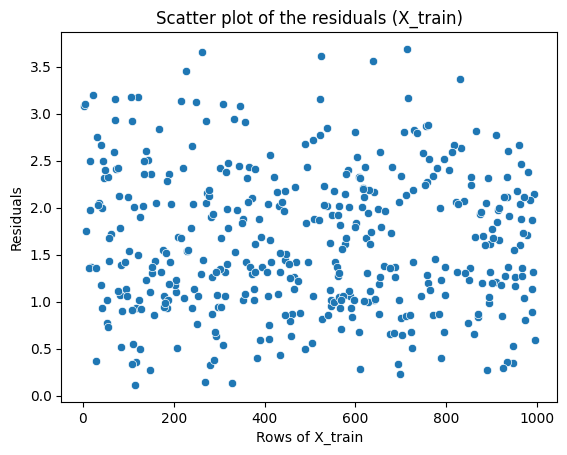

In [133]:
sns.scatterplot(residuals2_normalized)
plt.xlabel('Rows of X_train')
plt.ylabel('Residuals')
plt.title('Scatter plot of the residuals (X_train)')
plt.show()

Let's find outliers, i.e., examples where the prediction error is extreme:

In [134]:
import numpy as np


In [135]:
extreme_e = pd.DataFrame({
    'y_train': y_train[np.abs(residuals>2.5)].values,
    'y_pred': np.round(y_pred[np.abs(residuals>2.5)], 2)})
extreme_e

,y_train,y_pred
0,26.70,20.42
1,13.54,10.65
2,6.61,2.00
3,17.69,9.66
4,13.72,9.66
...,...,...
197,43.24,39.32
198,14.27,11.65
199,33.68,30.85
200,23.15,20.51


Este código cria um DataFrame chamado `extreme_e` que contém duas colunas, `y_train` e `y_pred`.

A primeira coluna, `y_train`, contém os valores reais da variável dependente y_train que têm resíduos maiores do que 2.5 (ou seja, aqueles que estão acima ou abaixo da linha de regressão por mais de 2.5 unidades).

A segunda coluna, `y_pred`, contém as previsões correspondentes para esses valores, arredondados para 2 casas decimais.

**=> O objetivo de criar esse DataFrame é analisar os casos em que o modelo tem maiores desvios em relação às previsões.**

**2nd HISTOGRAM**

To plot the histogram of the residuals will help to further understand the structure of the prediciton errors:

Um **histograma dos resíduos** pode ajudar a avaliar se a distribuição dos erros é normalmente distribuída, o que é uma suposição comum em muitos modelos de regressão.


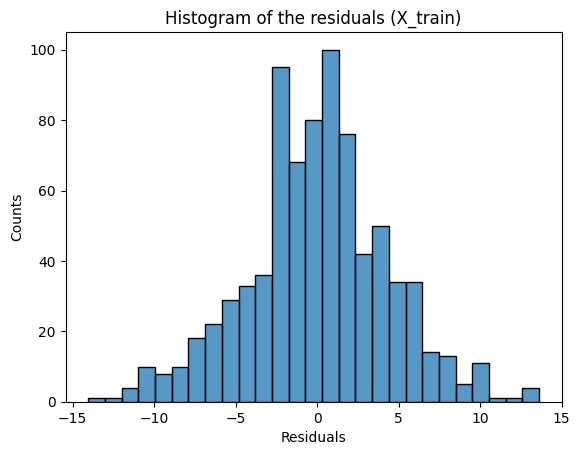

In [136]:
sns.histplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Counts')
plt.title('Histogram of the residuals (X_train)')
plt.show()

**ANALYSIS** 


#**6. LASSO REGRESSION**

Pode ser uma opção útil se houver muitas variáveis independentes e houver suspeitas de que algumas delas não contribuam significativamente para a previsão da variável dependente. A Lasso regression pode ajudar a identificar e remover essas variáveis desnecessárias, melhorando a precisão do modelo e reduzindo a chance de overfitting. No entanto, é importante lembrar que a escolha do modelo ideal dependerá dos dados específicos e da natureza do problema em questão.

1. Sometimes, some predictors are week, in the sense that the respective coeficient is close to zero, but not zero.

2. When a predictor has little impact on the prediction, we should remove it from the model:
* A parsimonious model (smaller number of predictors) can be better and more easily interpreted;
* The larger the number of predictors, the more data we need to ensure good predictive performance of the models.

To remove weak predictors, Lasso Regression is a great tool, as it removes them automatically. Lasso Regression sets to zero the weaker predictors automatically. To load the `Lasso` function:

In [137]:
from sklearn.linear_model import Lasso


To apply the Lasso Regression we just need to replace the linear regression model by the Lasso one.


In [138]:
pipe2 = Pipeline([
    ('pre', preprocessor),
    ('lasso',  Lasso(alpha=0.1))
])

In [139]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_tr',
                                                  Pipeline(steps=[('ages',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function get_ages at 0x7fd359de3b80>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['bdate']),
                                                 ('week_tr',
                                                  Pipeline(steps=[('weekd',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function get_weekdays at 0x7fd31e507430>)),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['datep']),
                                                 ('team_tr',
                                                  OneHotEncoder(drop='first'),
                                                  ['team']),
                                                 ('scale_tr', StandardScaler(),
                                                  ['prized', 'prizeq'])])),
                ('lasso', Lasso(alpha=0.1))])

In [140]:
print(preprocessor.get_feature_names_out())
print(pipe2.named_steps['lasso'].coef_)


['age_tr__bdate' 'week_tr__datep_1' 'week_tr__datep_2' 'week_tr__datep_3'
 'week_tr__datep_4' 'team_tr__team_2' 'team_tr__team_3' 'team_tr__team_4'
 'team_tr__team_5' 'team_tr__team_6' 'team_tr__team_7' 'team_tr__team_8'
 'team_tr__team_9' 'team_tr__team_10' 'scale_tr__prized'
 'scale_tr__prizeq' 'remainder__training']
[  0.03130011  -0.55160365  -0.          -0.          17.69430722
  -0.           9.01272689  -0.           0.          -0.
   8.55764264  -2.29761405   0.          -0.          -8.59784934
   4.31942568 -18.42309227]


In [141]:
feature_names = preprocessor.get_feature_names_out()
coefficients = pipe2.named_steps['lasso'].coef_
df3 = pd.DataFrame({'Feature Name': feature_names, 'Coefficient': coefficients})
print(df3)

           Feature Name  Coefficient
0         age_tr__bdate     0.031300
1      week_tr__datep_1    -0.551604
2      week_tr__datep_2    -0.000000
3      week_tr__datep_3    -0.000000
4      week_tr__datep_4    17.694307
5       team_tr__team_2    -0.000000
6       team_tr__team_3     9.012727
7       team_tr__team_4    -0.000000
8       team_tr__team_5     0.000000
9       team_tr__team_6    -0.000000
10      team_tr__team_7     8.557643
11      team_tr__team_8    -2.297614
12      team_tr__team_9     0.000000
13     team_tr__team_10    -0.000000
14     scale_tr__prized    -8.597849
15     scale_tr__prizeq     4.319426
16  remainder__training   -18.423092


As discussed previously, some of the coefficients were forced down to zero, the weaker ones.
Let’s us now evaluate the predictive performance of the model in the train set:

**PREDICTIVE PERFORMANCE**

In [142]:
y_pred = pipe2.predict(X_train)
print(f'R2= {r2_score(y_train, y_pred):0.03f}')
print(f'MAE= {mean_absolute_error(y_train, y_pred):0.03f}')
print(f'RMSE= {mean_squared_error(y_train, y_pred, squared=False):0.03f}')

R2= 0.915
MAE= 3.304
RMSE= 4.389


The predictive performance of our model seems to be quite good. Should we expect it to also perform good in the test set?

In [143]:
y_pred = pipe2.predict(X_test)
print(f'R2= {r2_score(y_test, y_pred):0.03f}')
print(f'MAE= {mean_absolute_error(y_test, y_pred):0.03f}')
print(f'RMSE= {mean_squared_error(y_test, y_pred, squared=False):0.03f}')

R2= 0.892
MAE= 3.758
RMSE= 5.037


The predictive performance of the model seems to be similar in both
sets, train and test.

# **OPTIMIZATION OF HYPERPARAMETERS**

In machine learning, a hyperparameter is a parameter whose value is set before the training process begins, as opposed to the model parameters that are learned during the training process. Hyperparameters are external to the model and cannot be learned from the data, but they have a significant influence on the performance of the model.
Hyperparameters are used to configure the model architecture, learning process, and optimization algorithm. They can include learning rate, number of layers in a neural network, batch size, activation function, regularization techniques, and many others.
Tuning hyperparameters is an important step in the model development process, as it helps to find the optimal configuration for a given problem. This process often involves techniques such as **grid search**, random search, or more advanced methods like Bayesian optimization to systematically explore different combinations of hyperparameters and identify the best-performing set. In our course, we will focus only on grid search.

**GRID SEARCH**

Grid search is a popular and straightforward technique used for hyperparameter tuning in machine learning. It works by exhaustively evaluating all possible combinations of hyperparameter values in a predefined search space to find the best configuration for a given model. Grid search can be applied to various machine learning algorithms, such as **Lasso regression** and K-Nearest Neighbors (KNN).

We will apply the hyperparameter optimization in the Lasso Regression on the car radios dataset.

The diference is once again in the definition of the pipeline. Before we have this...

In [144]:
pipe = Pipeline([
    ('pre', preprocessor),
    ('lasso', Lasso(alpha=0.1))
])

ALPHA - is a hyperparameter. It controls the magnitude of penalty Lasso regression introduces. A larger value of alpha will increase the penalty, which in turn will shrink the coefficients toward zero. Consequently, with a larger alpha, more coefficients are likely to be exactly zero, effectively reducing the number of features used in the model. On the other hand, a smaller value of alpha will result in a weaker penalty, leading to fewer coefficients being forced to zero.
Typically, it is used alpha=0.1, but we do not know whether there is a better value for alpha. Then, we can **create a grid of values for alpha** and **search for the best value**. To accomplish this in Python, we first need to define a dictionary with the values for alpha we want to test (and we want, for instance, to test 0.01, 0.02, 0.03, 0.04, 0.05, 0.5):

Now, with optimization of hyperparameter we will have this...

In [145]:
hyper = {
    'alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.5]
}

To load the library with the `GridSearchCV` function:

In [146]:
from sklearn.model_selection import GridSearchCV

To apply the grid search, we need to redefine the final pipeline:

In [147]:
pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(Lasso(),hyper, cv=5))])

After fitting the new pipeline, we will get the best value for alpha (among the ones tried out):

In [148]:
pipe.fit(X_train, y_train)
pipe.named_steps['grid'].best_params_

{'alpha': 0.03}

In our case, the best value for alpha that was found is 0.03.

To make predictions using the optimized value for alpha, we just use the usual command, as pipe learns to uses the best value for alpha:

In [149]:
pipe.predict(X_train)

array([19.96056509, 20.59117733, 10.93514512,  2.23575999, 30.25658068,
       20.57505505, 38.45164548, 20.57505505, 30.46105352, 20.69144784,
       30.25658068, 38.55191599,  2.08397466, 20.33294553, 20.45473044,
       20.69144784, 39.44519634, 20.67532556,  2.35215277, 20.47085272,
       39.44519634, 57.52625961, 20.45473044, 10.10744827, 10.20771878,
       20.67532556,  1.99982643,  2.01516487,  2.13155766, 29.42888384,
       48.33764395, 17.42326514, 10.10744827, 20.33294553, 39.44519634,
       11.35199257, 38.55191599, 30.14018789,  1.52445593, 39.42907406,
        2.11543538,  2.25188227, 20.81177245, 39.42907406, 30.14018789,
       20.69144784, 38.7725111 , 38.6722406 ,  1.52445593, 39.22460123,
       -0.65779812, 20.37058221, 39.54546685,  1.27240009, 39.42907406,
       10.86128363,  1.17212959, 11.23166796, 10.93514512, 19.86375099,
       29.44917812, -0.55752762, 20.47085272,  2.25188227, 11.46838536,
       19.76348049, 19.54288537,  1.17212959, 20.47085272,  1.42

In [150]:
y_pred = pipe.predict(X_train)
print(f'R2= {r2_score(y_train, y_pred):0.03f}')
print(f'MAE= {mean_absolute_error(y_train, y_pred):0.03f}')
print(f'RMSE= {mean_squared_error(y_train, y_pred, squared=False):0.03f}')

R2= 0.917
MAE= 3.319
RMSE= 4.341


In [151]:
y_pred = pipe.predict(X_test)
print(f'R2= {r2_score(y_test, y_pred):0.03f}')
print(f'MAE= {mean_absolute_error(y_test, y_pred):0.03f}')
print(f'RMSE= {mean_squared_error(y_test, y_pred, squared=False):0.03f}')

R2= 0.893
MAE= 3.782
RMSE= 5.009


**CROSS-VALIDATION**

Cross-validation is used to **measure the predictive performance corresponding to each value of the hyperparameter** considered.
It starts by dividing the training set into k equally-sized subsets, or folds. In each iteration of the cross-validation process, one of these folds is used as the test fold, and the remaining k-1 folds are used, together, as the training set (do not confuse this training set with the original training set – this training set is a set resulting from the union of all mentioned k-1 folds).
For each value of the hyperparameter in the grid, the model is trained using the training set (formed by the k-1 folds) and evaluated on the test fold. This process is repeated k times, with each fold serving as the test fold once. A predictive performance metric, such as accuracy or mean squared error, is averaged across the k iterations to produce a single performance score for the given hyperparameter value.
After evaluating all possible values of the hyperparameter, the value that yields the best performance score is selected as the optimal value of the hyperparameter for the model. The parameter cv=5 used in the GridSearchCV function instructs the function to use 5 folds.